In [ ]:
import pandas as pd
import seaborn as sn

In [ ]:
heart_df= pd.read_csv('heart_disease_data.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_df.shape

(303, 14)

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target', ylabel='Count'>

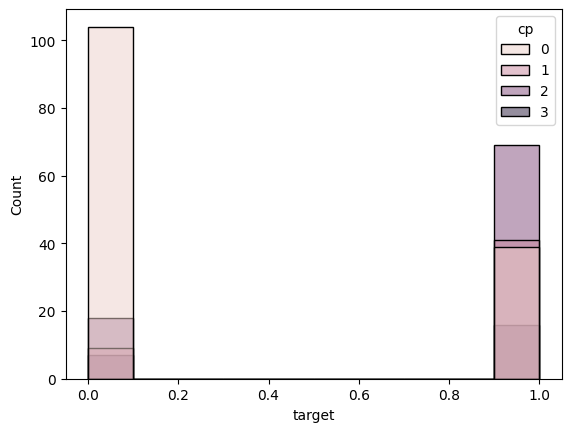

In [ ]:
sn.histplot(data=heart_df,x='target',hue='cp')

Text(0.5, 1.0, "The person's maximum heart rate achieved")

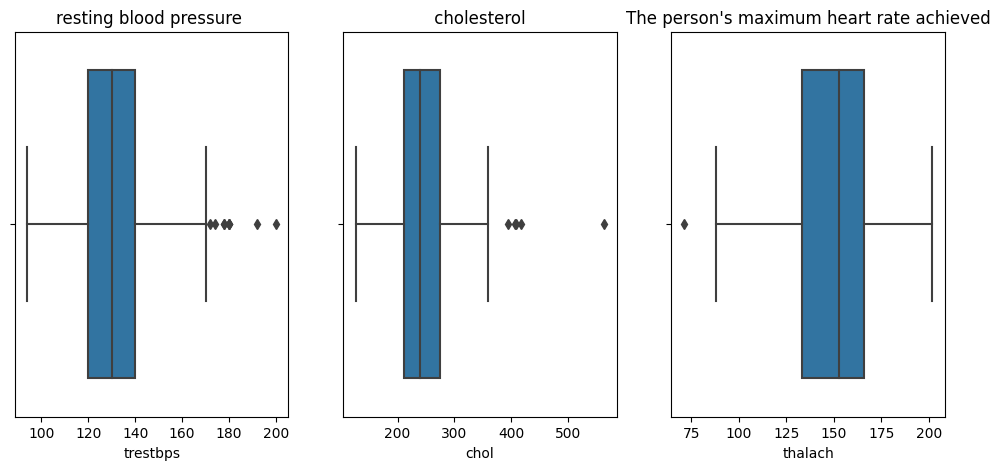

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

sn.boxplot(x='trestbps',data=heart_df, ax=axes[0])
sn.boxplot(x='chol',data=heart_df, ax=axes[1])
sn.boxplot(x='thalach',data=heart_df, ax=axes[2])
axes[0].set_title('resting blood pressure ')
axes[1].set_title(' cholesterol ')
axes[2].set_title("The person's maximum heart rate achieved")

<Axes: xlabel='cp', ylabel='trestbps'>

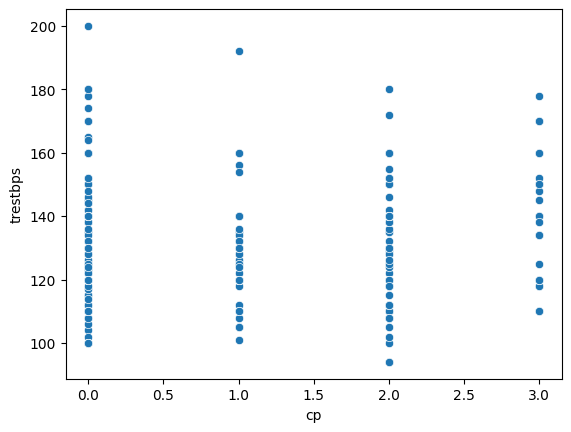

In [ ]:
sn.scatterplot(x='cp',y='trestbps',data=heart_df)

In [ ]:
from scipy import stats
group1 = heart_df[heart_df['target'] == 0]['age']
group2 = heart_df[heart_df['target'] == 1]['age']
t_stat, p_value = stats.ttest_ind(group1, group2)
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 4.014560975148874
P-value: 7.524801303442373e-05


In [ ]:
data= heart_df.drop('target', axis=1)
target=heart_df['target']
x_train, x_test,y_train,y_test = train_test_split(data,target, test_size=0.2)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data) 

VarianceThreshold(threshold=0)

In [ ]:
x=data[data.columns[var_thres.get_support()]]
x_train, x_test,y_train,y_test = train_test_split(x,target, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier # with threshold value 0
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

1.0
0.9016393442622951


In [ ]:
from sklearn.linear_model import LogisticRegression 
x_train, x_test,y_train,y_test = train_test_split(x,target, test_size=0.2)
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.8760330578512396
0.7704918032786885


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


In [ ]:
# Highly coorelated data
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(data, 0.5)

{'slope'}

In [ ]:
from sklearn.linear_model import LogisticRegression # In randomforest it got overfit that's why we tried Logistic regrssion
x= data.drop('slope', axis=1)
y=heart_df['target']
x_train, x_test,y_train,y_test = train_test_split(data,target, test_size=0.2)
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.8512396694214877
0.8360655737704918


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# information gain for feature selection
from sklearn.feature_selection import mutual_info_regression
x= heart_df.drop('target', axis=1)
y= heart_df.target
mutual_info = mutual_info_regression(x, y)
mutual_info

array([1.16002130e-04, 0.00000000e+00, 1.02815171e-01, 0.00000000e+00,
       7.45730418e-02, 0.00000000e+00, 0.00000000e+00, 6.90871647e-02,
       9.02957160e-02, 1.07268793e-01, 1.35417039e-01, 8.58832569e-02,
       9.45838054e-02])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

slope       0.135417
oldpeak     0.107269
cp          0.102815
thal        0.094584
exang       0.090296
ca          0.085883
chol        0.074573
thalach     0.069087
age         0.000116
sex         0.000000
trestbps    0.000000
fbs         0.000000
restecg     0.000000
dtype: float64

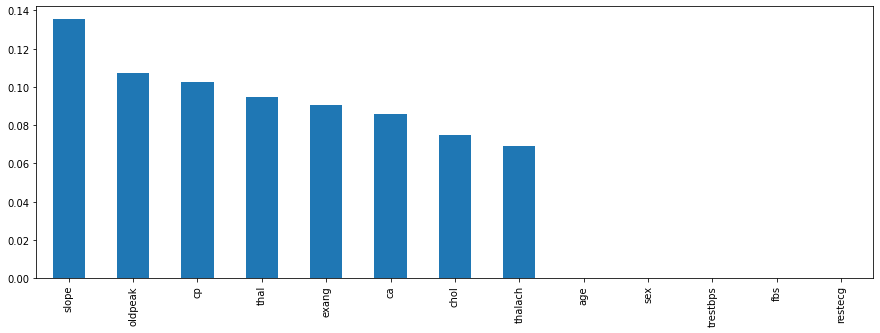

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5));

In [ ]:
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=9)
selected_top_columns.fit(x, y)

SelectPercentile(percentile=9,
                 score_func=<function mutual_info_regression at 0x7f3f4d5c54c0>)

In [ ]:
selected_top_columns.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [ ]:
x.columns[selected_top_columns.get_support()]

Index(['ca', 'thal'], dtype='object')

In [ ]:
x= x[['ca','thal']]

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
x_train.shape

(242, 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_test,y_test)

0.7868852459016393

In [ ]:
# without feature selection score
x_train, x_test,y_train,y_test = train_test_split(heart_df.drop('target',axis=1),heart_df.target, test_size=0.2)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7377049180327869

In [ ]:
# ch1 square
# chi2 returns 2 values
# Fscore and the pvalue
from sklearn.feature_selection import chi2
x= heart_df.drop('target', axis=1)
y= heart_df.target
f_p_values=chi2(x,y)
f_p_values

(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

In [ ]:
p_values=pd.Series(f_p_values[1])
p_values.index=x.columns
p_values.sort_values()  # thalach is most important feature

thalach     7.395102e-43
oldpeak     1.552583e-17
ca          3.605677e-16
cp          2.534982e-15
exang       4.428074e-10
chol        9.957148e-07
age         1.395673e-06
trestbps    1.180286e-04
slope       1.741237e-03
sex         5.912318e-03
thal        1.610061e-02
restecg     8.438939e-02
fbs         6.523632e-01
dtype: float64

In [ ]:
x1= x[['thalach','oldpeak','ca','cp','exang']]

x_train, x_test,y_train,y_test = train_test_split(x1,y, test_size=0.2)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7704918032786885

## wrapper methods

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression()
sel = EFS(lr, max_features=7, scoring='accuracy', cv=5)

model = sel.fit(heart_df.drop('target',axis=1),heart_df['target'])

Streaming output truncated to the last 5000 lines.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs fai

In [ ]:
print(model.best_score_)
print(model.best_feature_names_)

0.851366120218579
('age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal')


In [ ]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.57377049, 0.73770492, 0.6557377 , 0.58333333, 0.56666667]),
  'avg_score': 0.6234426229508196,
  'feature_names': ('age',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.59016393, 0.59016393, 0.60655738, 0.7       , 0.58333333]),
  'avg_score': 0.6140437158469946,
  'feature_names': ('sex',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.7704918 , 0.7704918 , 0.73770492, 0.78333333, 0.73333333]),
  'avg_score': 0.7590710382513661,
  'feature_names': ('cp',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.40983607, 0.63934426, 0.59016393, 0.53333333, 0.6       ]),
  'avg_score': 0.5545355191256831,
  'feature_names': ('trestbps',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.54098361, 0.49180328, 0.55737705, 0.55      , 0.55      ]),
  'avg_score': 0.5380327868852459,
  'feature_names': ('chol',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.47540984, 0.54098361, 0.47540984, 0.55      , 0.55      ]),
  'avg_sco

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(heart_df.drop('target',axis=1),heart_df.target, test_size=0.2)
X_train_sel = sel.transform(x_train)
X_test_sel = sel.transform(x_test)

from sklearn.model_selection import cross_val_score

lr=LogisticRegression()
lr.fit(X_train_sel,y_train)
print(lr.score(X_train_sel,y_train))
print(lr.score(X_test_sel,y_test))

0.8471074380165289
0.8360655737704918


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # Sequential Backward Elimination

X_train, X_test, y_train, y_test = train_test_split(heart_df.drop('target',axis=1), heart_df['target'], test_size=0.2, random_state=1)


In [ ]:
lr = LogisticRegression()

sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 13),
                          scoring='r2')

In [ ]:
idx=list(sfs.k_feature_idx_)
idx

[0, 3, 4, 5, 7, 8]

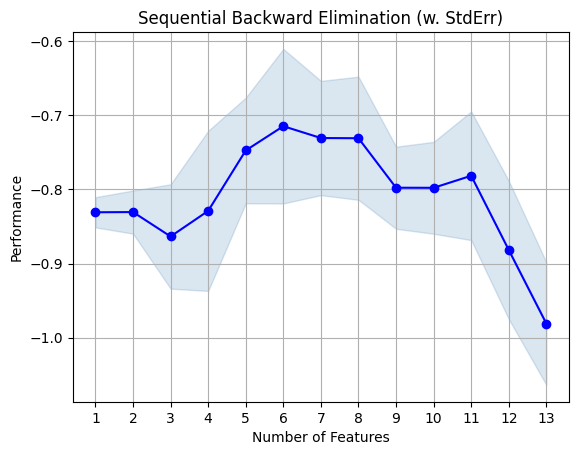

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
x_train=x_train.iloc[:,idx]
x_test=x_test.iloc[:,idx]

lr = LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.731404958677686
0.7377049180327869
